In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(37)

,id,qid1,qid2,question1,question2,is_duplicate
400442,400442,196000,159411,How do the brain structures of ants change as ...,How do the brain structures of dragonflies cha...,0
267158,267158,177801,384465,Is it okay to have a pulse rate of 102 beats p...,What are normal pulse rates?,0
120127,120127,194885,194886,Which are the Places to visit in Baster in Chh...,What are the best places to visit in Chhattisg...,0
346316,346316,123739,10731,What is the deep internet?,What is the Deep Web?,1
388903,388903,521344,521345,What is Angle of Attack and how does it relate...,Aerodynamics: What is the role of Angle of Att...,1
261835,261835,378052,378053,How much I can earn by investing 500 - 1000 ev...,I am ready to invest 1.5k/month. How do I inve...,0
116482,116482,189741,189742,What is Your story of CA Final result day?,What is your success story of becoming a Chart...,0
95170,95170,158785,158786,What is the chipset on the motherboard?,What is the chipset in a motherbord? How do we...,1
367327,367327,497595,497596,"How did wings evolve, given that they're not u...",Why did mosquitoes evolve to use blood to meet...,0
363361,363361,315066,245305,Why is my YouTube video not showing? How can I...,Why is my computer unable to play YouTube vide...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:


# missing values
df.isnull().sum()



id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

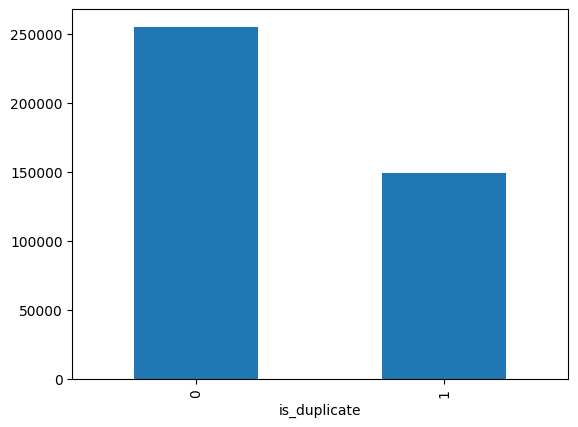

In [9]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


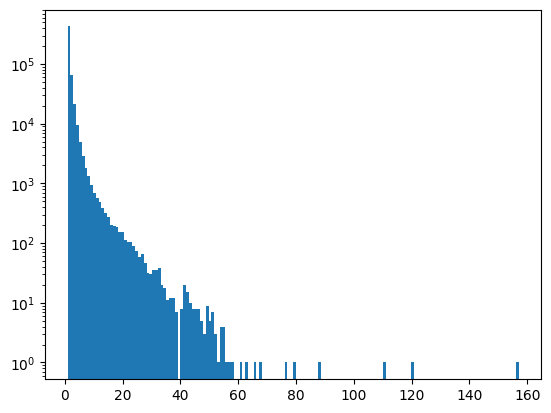

In [11]:


# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

